In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../csv_files/space_missions_utf8.csv")

In [3]:
df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


Company
RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Name: count, dtype: int64


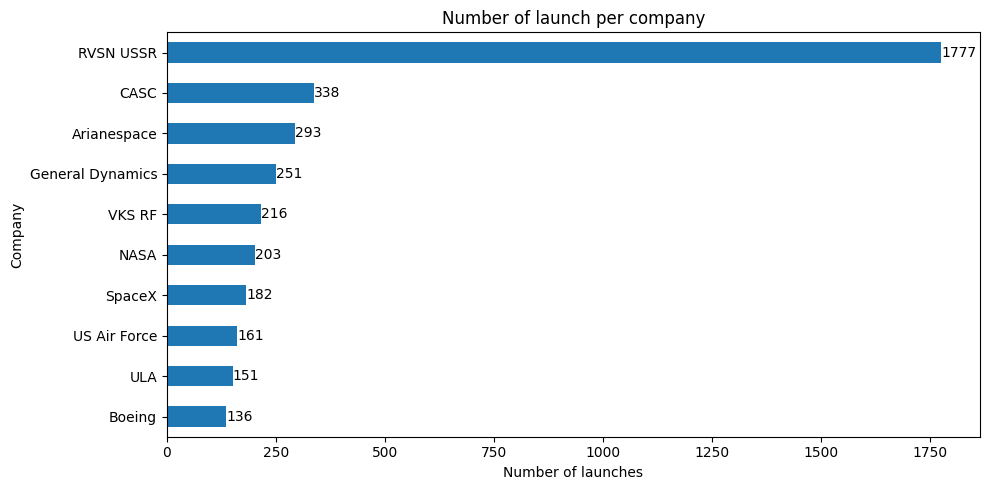

In [110]:
# Count occurences of each comapny 
company_counts = df['Company'].value_counts().head(10)
print(company_counts)

#Sort
company_counts = company_counts.sort_values(ascending=True)
    
# Plot the graph
plt.figure(figsize=(10, 5))
ax = company_counts.plot(kind='barh')

# Adding labels on bars
for index, value in enumerate(company_counts):
    ax.text(value, index, str(value), va='center')

plt.xlabel('Number of launches')
plt.ylabel('Company')
plt.title('Number of launch per company')
plt.tight_layout()
plt.savefig('graphs/top_10_companies.png') #save in 
plt.show()

In [119]:
def split_location(location):
    
    parts = location.split(', ')
    
    site = None
    cosmodrome = None
    state = None
    country = None
    
    if len(parts) == 4:
        # Format: site, cosmodrome, state, country
        site = parts[0]
        cosmodrome = parts[1]
        state = parts[2]
        country = parts[3]
    elif len(parts) == 3:
        # Format: site, cosmodrome, country
        site = parts[0]
        cosmodrome = parts[1]
        state = None
        country = parts[2]
    elif len(parts) == 2:
        # Format: cosmodrome, country
        site = None
        cosmodrome = parts[0]
        state = None
        country = parts[1]
    elif len(parts) == 1:
        # Format: country
        site = None
        cosmodrome = None
        state = None
        country = parts[0]
    
    return site, cosmodrome, state, country

df_for_cosmodromes = df.copy()
df_for_cosmodromes[['Site', 'Cosmodrome', 'State', 'Country']] = df['Location'].apply(split_location).apply(pd.Series)




In [116]:
df_for_cosmodromes

Cosmodrome
Plesetsk Cosmodrome                1278
Baikonur Cosmodrome                 719
Cape Canaveral AFS                  658
Vandenberg AFB                      442
Guiana Space Centre                 314
Kennedy Space Center                205
Jiuquan Satellite Launch Center     144
Xichang Satellite Launch Center     130
Kapustin Yar                        112
Tanegashima Space Center             88
Name: count, dtype: int64


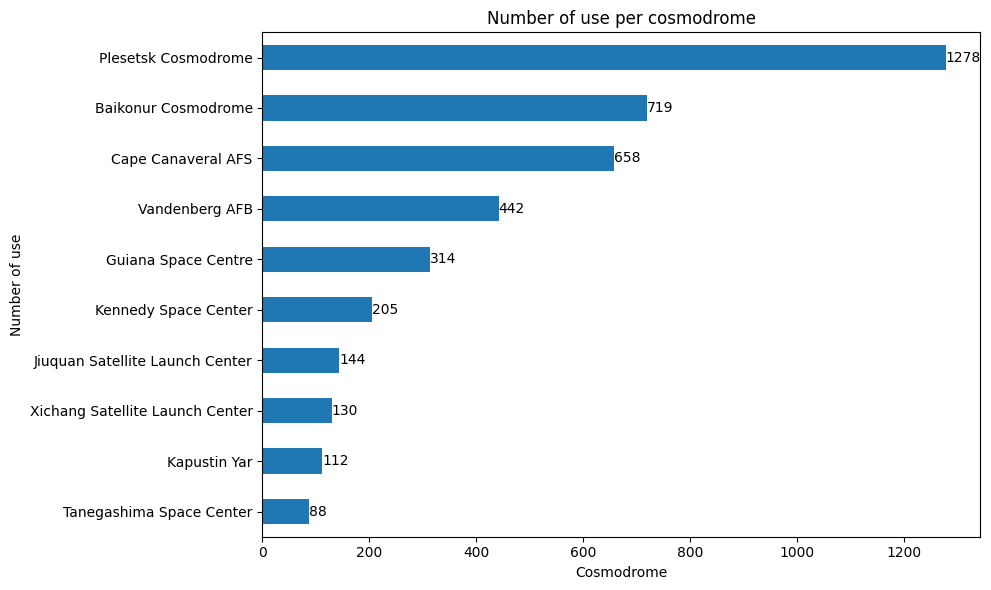

In [109]:
# Count occurences of each cosmodrome 
cosmodrome_counts = df_for_cosmodromes['Cosmodrome'].value_counts().head(10)
print(cosmodrome_counts)

#Sort
cosmodrome_counts = cosmodrome_counts.sort_values(ascending=True)
    
# Plot the graph
plt.figure(figsize=(10, 6))
ax = cosmodrome_counts.plot(kind='barh')

# Adding labels on bars
for index, value in enumerate(cosmodrome_counts):
    ax.text(value, index, str(value), va='center')

plt.xlabel('Cosmodrome')
plt.ylabel('Number of use')
plt.title('Number of use per cosmodrome')
plt.tight_layout()
plt.savefig('graphs/top_10_cosmodromes.png') #save in 
plt.show()

In [ ]:
# Utworzenie nowego DataFrame z kolumną 'Date'
df_date = df[['Date']]

df_date = df_date['Date'] = pd.to_datetime(df_date['Date'])
#df['Year'] = df['Date'].dt.year
#df_date['Year'] = df_date['Date'].dt.year
printd f_date